In [1]:
import tensorflow as tf
keras = tf.keras
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# %run ../src/acc_df.py
# Ac = Acc_data('../data/cleaned/coll_coord.csv')
# acc = Ac.get_all_coll() #['']

### 1. Turn it into a time series of weeks

In [3]:
week_numbers = pd.read_csv('../../data/cleaned/weekseries_05_18.csv')

In [4]:
week_numbers.head(2),week_numbers.tail(2)

(           ds  acc_nr
 0  2005-01-02     275
 1  2005-01-09     308,              ds  acc_nr
 729  2018-12-23     234
 730  2018-12-30     150)

In [5]:
acc_nr_bw = week_numbers.acc_nr.values #[:100]

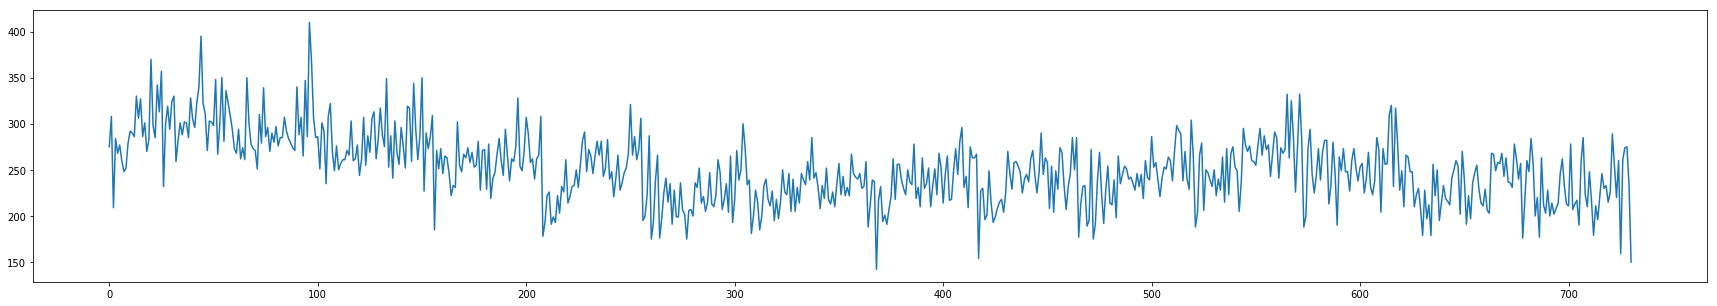

In [6]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(week_numbers.index.values, acc_nr_bw)

#### Windowize and split

In [7]:
def windowize_data(data, n_prev):
    n_predictions = len(data) - n_prev
    y = data[n_prev:]
    # this might be too clever
    indices = np.arange(n_prev) + np.arange(n_predictions)[:, None]
    x = data[indices, None]
    return x, y

In [8]:
# windowize_data(week_numbers.index.values,20)

In [9]:
def split_and_windowize(data, n_prev, fraction_test=0.3):
    n_predictions = len(data) - 2*n_prev
    
    n_test  = int(fraction_test * n_predictions)
    n_train = n_predictions - n_test   
    
    x_train, y_train = windowize_data(data[:n_train], n_prev)
    x_test, y_test = windowize_data(data[n_train:], n_prev)
    return x_train, x_test, y_train, y_test

In [10]:
n_prev = 100
x_train, x_test, y_train, y_test = split_and_windowize(acc_nr_bw,n_prev,fraction_test=0.1)

#### Model

In [11]:
model = keras.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.18))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.18))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.18))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.18))
# model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
              loss='mean_squared_error')

### Train

In [12]:
model.fit(x_train, y_train, batch_size=32, epochs=2000)

Train on 378 samples
Epoch 1/2000
378/378 [==============================] - 8s 21ms/sample - loss: 59194.8621
Epoch 2/2000
378/378 [==============================] - 3s 7ms/sample - loss: 57699.9981
Epoch 3/2000
378/378 [==============================] - 3s 7ms/sample - loss: 57067.0083
Epoch 4/2000
378/378 [==============================] - 3s 7ms/sample - loss: 56661.4444
Epoch 5/2000
378/378 [==============================] - 3s 7ms/sample - loss: 56357.5558
Epoch 6/2000
378/378 [==============================] - 3s 7ms/sample - loss: 56111.1025
Epoch 7/2000
378/378 [==============================] - 3s 7ms/sample - loss: 55886.2282
Epoch 8/2000
378/378 [==============================] - 3s 7ms/sample - loss: 55680.4517
Epoch 9/2000
378/378 [==============================] - 3s 7ms/sample - loss: 55483.6323
Epoch 10/2000
378/378 [==============================] - 3s 7ms/sample - loss: 55292.8495
Epoch 11/2000
378/378 [==============================] - 3s 7ms/sample - loss: 55083.28

In [13]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[243.84082],
       [243.84082],
       [243.84082],
       [243.84082],
       [243.84082]], dtype=float32)

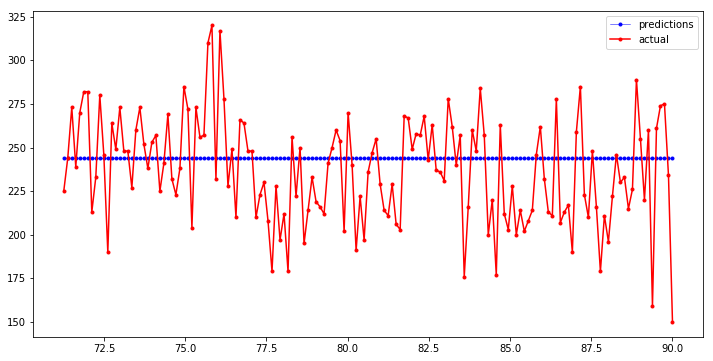

In [14]:
n_pts = len(acc_nr_bw)
t = np.linspace(0, 15 * 6, n_pts)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t[-len(y_test):], y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(t[-len(y_test):], y_test, 'r.-', label='actual')
ax.legend()

#### next try

In [17]:
model = keras.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=32, epochs=1000)

Train on 428 samples
Epoch 1/1000
428/428 [==============================] - 4s 10ms/sample - loss: 62454.2150
Epoch 2/1000
428/428 [==============================] - 1s 3ms/sample - loss: 60661.2888
Epoch 3/1000
428/428 [==============================] - 1s 3ms/sample - loss: 59993.5739
Epoch 4/1000
428/428 [==============================] - 1s 3ms/sample - loss: 59575.9855
Epoch 5/1000
428/428 [==============================] - 1s 3ms/sample - loss: 59256.7818
Epoch 6/1000
428/428 [==============================] - 1s 3ms/sample - loss: 58984.8113
Epoch 7/1000
428/428 [==============================] - 1s 3ms/sample - loss: 58733.3408
Epoch 8/1000
428/428 [==============================] - 1s 3ms/sample - loss: 58495.8727
Epoch 9/1000
428/428 [==============================] - 1s 3ms/sample - loss: 58265.2848
Epoch 10/1000
428/428 [==============================] - 1s 3ms/sample - loss: 58038.8558
Epoch 11/1000
428/428 [==============================] - 1s 3ms/sample - loss: 57815.93

In [18]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[249.86105],
       [249.86105],
       [249.86105],
       [249.86105],
       [249.86105]], dtype=float32)

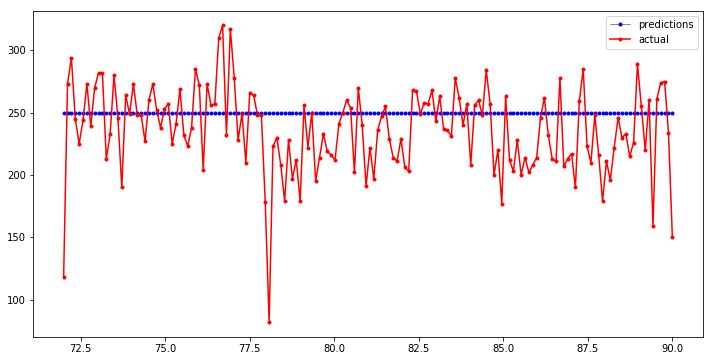

In [19]:
n_pts = len(acc_nr_bw)
t = np.linspace(0, 15 * 6, n_pts)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t[-len(y_test):], y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(t[-len(y_test):], y_test, 'r.-', label='actual')
ax.legend()